<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              470 non-null    object 
 1   Open              470 non-null    float64
 2   High              470 non-null    float64
 3   Low               470 non-null    float64
 4   Close             470 non-null    float64
 5   Adj Close         470 non-null    float64
 6   Volume            470 non-null    float64
 7   fluctuation rate  470 non-null    float64
dtypes: float64(7), object(1)
memory usage: 29.5+ KB
None
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'fluctuation rate'],
      dtype='object')
               Open          High           Low         Close     Adj Close  \
count    470.000000    470.000000    470.000000    470.000000    470.000000   
mean   15060.411341  16119.469740  14012.272338  15149.926575  15149.926575   
std    1627

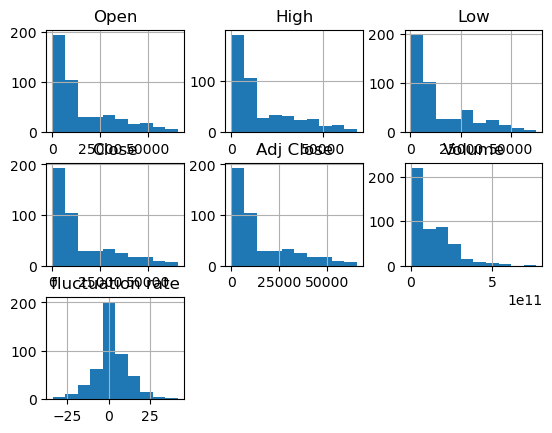

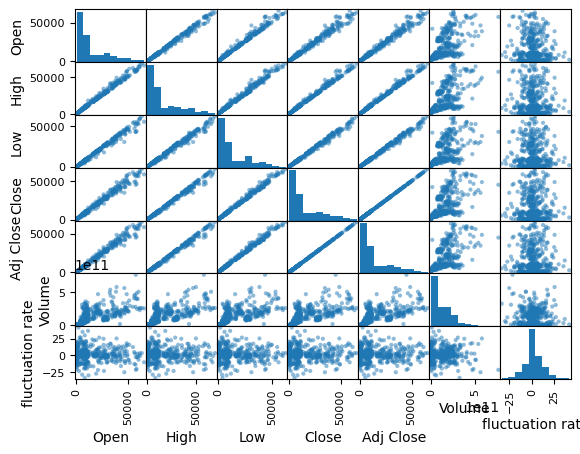

In [34]:
import pandas as pd
from pandas.plotting import scatter_matrix
dataset=pd.read_csv('BTC-USD.csv')
print(dataset.info()) #check if there is any empty value in the data set.
print(dataset.keys())
print(dataset.describe())
print(dataset.hist())
attr =['Open','High','Low','Close','Adj Close','Volume','fluctuation rate']
scatter_matrix(dataset[attr])
numerical_data = dataset.select_dtypes(include='number')
corr_data=numerical_data.corr()
print(corr_data)

# Did you discover interesting relations?

##### It appears that the variables **'Open', 'High', 'Low', 'Close', and 'Adj Close'** exhibit a strong positive correlation with each other, indicating their high association with price-related factors. However, there wasn't a significant lead-lag relationship found between the variables 'Volume' and 'fluctuation rate'. Nonetheless, in the case of **'Volume'**, a lead relationship of **0.727335** was observed with **'High'**, suggesting a correlation between higher trading volumes and higher prices.

# What feature/s would you like to be able to predict?
- To predict the characteristics that form a high price range, various factors related to high prices need to be considered. These may include not only the 'High' variable but also other price-related variables such as 'Open,' 'Low,' 'Close,' 'Adj Close,' and more. Additionally, trading volume is considered a crucial factor influencing high prices. Analyzing these variables collectively enables the prediction of features contributing to the formation of a high price range.

- Similarly, predicting the characteristics forming a low price range involves a comparable approach. By considering variables related to low prices, such as 'Open,' 'High,' 'Low,' 'Close,' 'Adj Close,' along with trading volume, it is possible to predict features contributing to the formation of a low price range.

- Trading volume plays a significant role in predicting both high and low prices. High trading volume can be considered a signal that may influence stock price movements, either upward or downward. Therefore, leveraging trading volume information can be helpful in predicting both high and low price ranges.

In [36]:
#cleanning dataset
dataset.drop_duplicates(inplace=True)
print(dataset.info()) #check if there is any empty value in the data set.
print(dataset.keys())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              470 non-null    object 
 1   Open              470 non-null    float64
 2   High              470 non-null    float64
 3   Low               470 non-null    float64
 4   Close             470 non-null    float64
 5   Adj Close         470 non-null    float64
 6   Volume            470 non-null    float64
 7   fluctuation rate  470 non-null    float64
dtypes: float64(7), object(1)
memory usage: 29.5+ KB
None
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'fluctuation rate'],
      dtype='object')
               Open          High           Low         Close     Adj Close  \
count    470.000000    470.000000    470.000000    470.000000    470.000000   
mean   15060.411341  16119.469740  14012.272338  15149.926575  15149.926575   
std    1627

In [39]:
#create the train and test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)